# Análise Exploratória dos Dados - Notas dos Alunos
Este notebook realiza uma análise exploratória dos dados do dataset `notas_alunos.csv`.

In [4]:
# 📦 Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


In [6]:
# Carregando o dataset
df = pd.read_csv("../datasets/notas_alunos.csv")
df.head()

,AlunoID,Código,Disciplina,Unidade 1,Unidade 2,Unidade 3,Unidade 4,Unidade 5,Prova Final,Resultado,Faltas,Situação
0,1,DC/CCN061,PROCESSAMENTO DE LINGUAGEM NATURAL,"7,1","9,4","10,0",NaN,NaN,NaN,"8,8",10,AM
1,1,DC/CCN040,SEGURANÇA EM SISTEMAS,"9,3","8,5","8,1",NaN,NaN,NaN,"8,6",14,AM
2,1,DC/CCN038,SISTEMAS DISTRIBUÍDOS,"8,0","10,0","9,0",NaN,NaN,NaN,"9,0",14,AM
3,1,DC/CCN071,TÓPICOS EM ENGENHARIA DE SOFTWARE,"9,4","9,0","7,5",NaN,NaN,NaN,"8,6",12,AM
4,1,DC/CCN032,COMPUTAÇÃO GRÁFICA,"8,0","7,0","10,0",NaN,NaN,NaN,"8,3",10,AM


## Informações gerais sobre o dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AlunoID      1332 non-null   int64 
 1   Código       1332 non-null   object
 2   Disciplina   1332 non-null   object
 3   Unidade 1    1332 non-null   object
 4   Unidade 2    1315 non-null   object
 5   Unidade 3    1315 non-null   object
 6   Unidade 4    16 non-null     object
 7   Unidade 5    16 non-null     object
 8   Prova Final  308 non-null    object
 9   Resultado    1332 non-null   object
 10  Faltas       1332 non-null   int64 
 11  Situação     1332 non-null   object
dtypes: int64(2), object(10)
memory usage: 125.0+ KB


## Estatísticas descritivas das colunas numéricas

In [4]:
df.describe()

,AlunoID,Faltas
count,1332.000000,1332.000000
mean,20.939940,5.165165
std,13.179886,5.867025
min,1.000000,0.000000
25%,9.000000,0.000000
50%,20.000000,4.000000
75%,34.000000,8.000000
max,40.000000,60.000000


## Verificando valores ausentes

In [5]:
df.isnull().sum()

AlunoID           0
Código            0
Disciplina        0
Unidade 1         0
Unidade 2        17
Unidade 3        17
Unidade 4      1316
Unidade 5      1316
Prova Final    1024
Resultado         0
Faltas            0
Situação          0
dtype: int64

# Tipos de Dados

In [9]:
if not df.empty:
    print("### Tipos de dados de cada coluna antes da conversão:")
    display(df.dtypes)

    print("\nVerificando e ajustando os tipos de dados para as colunas específicas...")

    # Lista de colunas que devem ser float
    float_cols = ['Unidade 1', 'Unidade 2', 'Unidade 3', 'Unidade 4', 'Unidade 5', 'Prova Final', 'Resultado']
    # Lista de colunas que devem ser int (agora inclui 'ID_Aluno' e 'Faltas')
    int_cols = ['AlunoID', 'Faltas']

    # Converter colunas para float
    for col in float_cols:
        if col in df.columns:
            try:
                # errors='coerce' converterá valores não numéricos em NaN (Not a Number)
                df[col] = pd.to_numeric(df[col], errors='coerce')
                print(f"Coluna '{col}' convertida para float.")
            except Exception as e:
                print(f"Erro ao converter a coluna '{col}' para float: {e}")
        else:
            print(f"Aviso: Coluna '{col}' não encontrada no DataFrame para conversão para float.")

    # Converter colunas para int
    for col in int_cols:
        if col in df.columns:
            try:
                # Primeiro, converte para float para lidar com NaN se houver, depois para pd.Int64Dtype()
                # pd.Int64Dtype() é o tipo inteiro do Pandas que suporta NaNs
                df[col] = pd.to_numeric(df[col], errors='coerce').astype(pd.Int64Dtype())
                print(f"Coluna '{col}' convertida para inteiro.")
            except Exception as e:
                print(f"Erro ao converter a coluna '{col}' para inteiro: {e}")
        else:
            print(f"Aviso: Coluna '{col}' não encontrada no DataFrame para conversão para inteiro.")

    # As demais colunas que não foram explicitamente convertidas manterão seus tipos originais
    # ou serão 'object' se contiverem strings misturadas.
    # Se você quiser forçar alguma coluna específica para string (object), pode fazer assim:
    # if 'Nome_do_Aluno' in df.columns:
    #     df['Nome_do_Aluno'] = df['Nome_do_Aluno'].astype(str)
    # print("Exemplo: Coluna 'Nome_do_Aluno' (se existir) convertida para string.")


    print("\n### Tipos de dados de cada coluna após a conversão:")
    display(df.dtypes)

### Tipos de dados de cada coluna antes da conversão:


AlunoID         int64
Código         object
Disciplina     object
Unidade 1      object
Unidade 2      object
Unidade 3      object
Unidade 4      object
Unidade 5      object
Prova Final    object
Resultado      object
Faltas          int64
Situação       object
dtype: object


Verificando e ajustando os tipos de dados para as colunas específicas...
Coluna 'Unidade 1' convertida para float.
Coluna 'Unidade 2' convertida para float.
Coluna 'Unidade 3' convertida para float.
Coluna 'Unidade 4' convertida para float.
Coluna 'Unidade 5' convertida para float.
Coluna 'Prova Final' convertida para float.
Coluna 'Resultado' convertida para float.
Coluna 'AlunoID' convertida para inteiro.
Coluna 'Faltas' convertida para inteiro.

### Tipos de dados de cada coluna após a conversão:


AlunoID          Int64
Código          object
Disciplina      object
Unidade 1      float64
Unidade 2      float64
Unidade 3      float64
Unidade 4      float64
Unidade 5      float64
Prova Final    float64
Resultado      float64
Faltas           Int64
Situação        object
dtype: object

## Distribuição das unidades e prova final

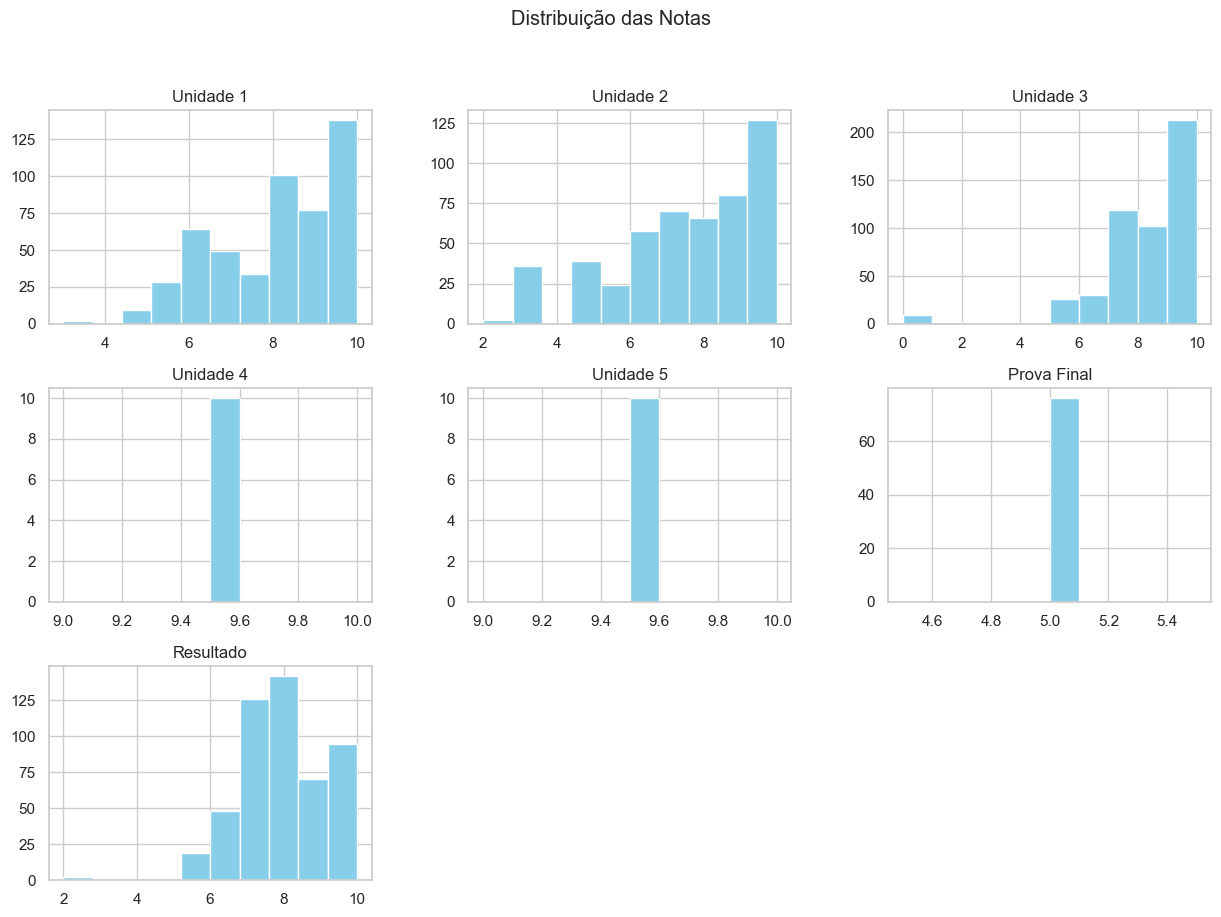

In [8]:
colunas_numericas = ['Unidade 1','Unidade 2','Unidade 3','Unidade 4','Unidade 5','Prova Final','Resultado']
df[colunas_numericas].hist(bins=10, figsize=(15,10), color="skyblue")
plt.suptitle("Distribuição das Notas")
plt.show()

## Boxplots para identificação de outliers

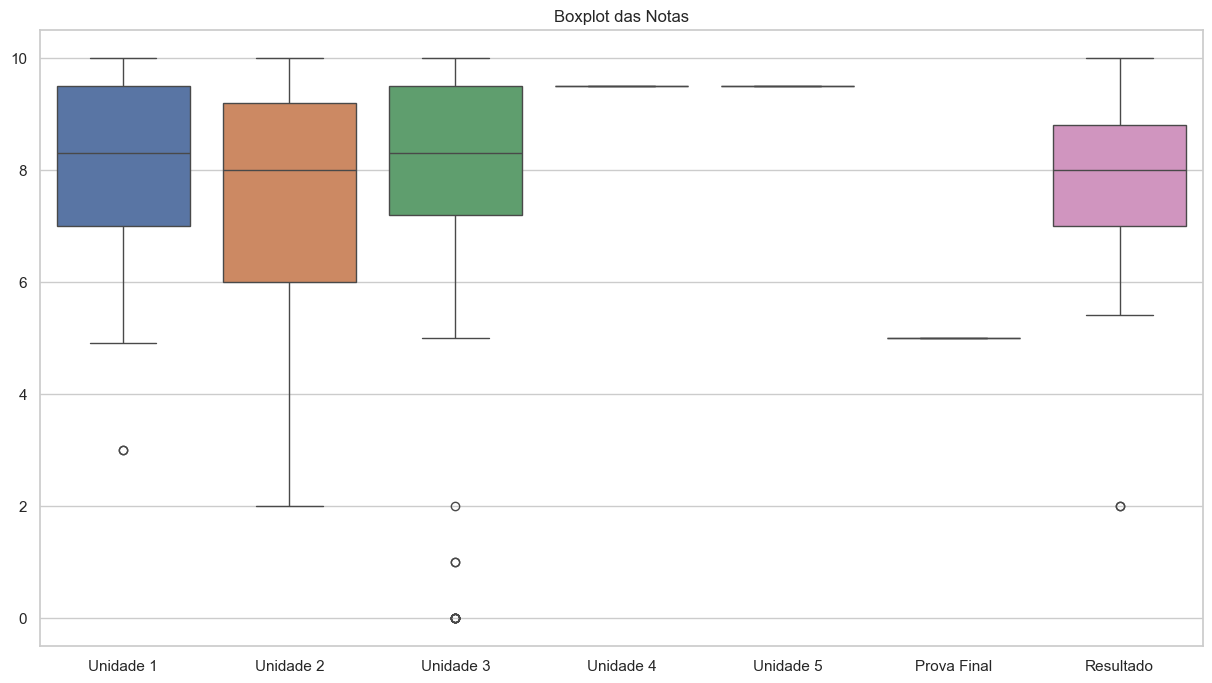

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df[colunas_numericas])
plt.title("Boxplot das Notas")
plt.show()

## Matriz de Correlação entre as notas

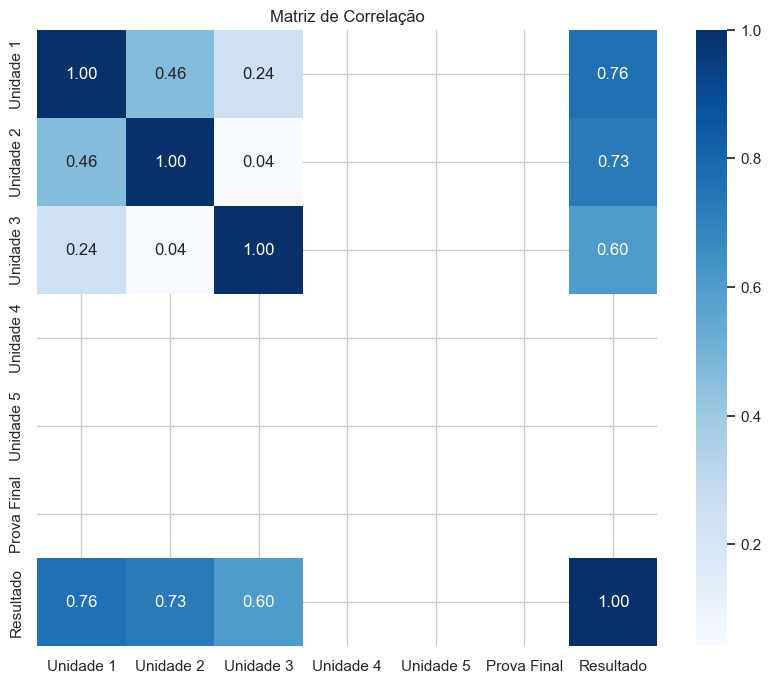

In [10]:
corr = df[colunas_numericas].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

## Análise da média dos alunos

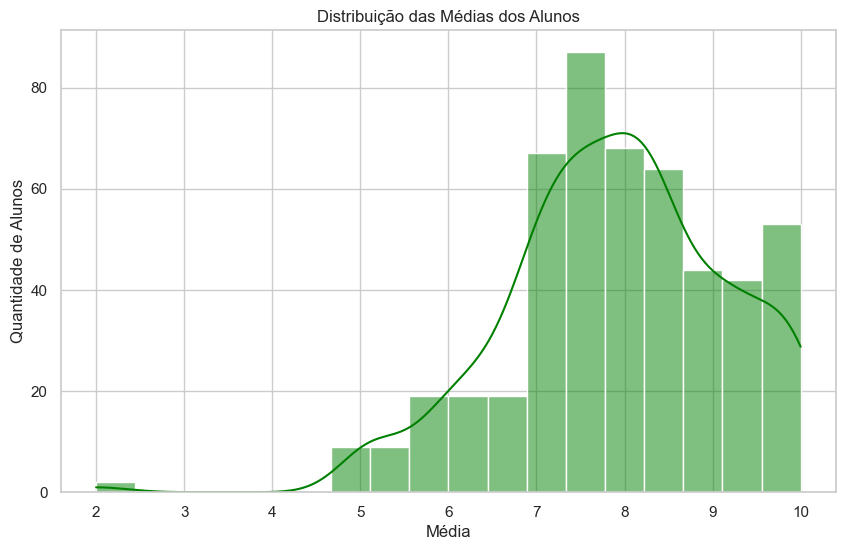

In [11]:
df['Media_Aluno'] = df[['Unidade 1','Unidade 2','Unidade 3','Unidade 4','Unidade 5']].mean(axis=1)

plt.figure(figsize=(10,6))
sns.histplot(df['Media_Aluno'], kde=True, color='green')
plt.title('Distribuição das Médias dos Alunos')
plt.xlabel('Média')
plt.ylabel('Quantidade de Alunos')
plt.show()

## Estatísticas detalhadas por disciplina

In [12]:
estatisticas = df[colunas_numericas].describe().T[['mean', 'std', 'min', 'max']]
estatisticas['coef_variação (%)'] = (estatisticas['std'] / estatisticas['mean']) * 100
estatisticas

,mean,std,min,max,coef_variação (%)
Unidade 1,8.079880,1.531666,3.0,10.0,18.956546
Unidade 2,7.497012,2.070526,2.0,10.0,27.618013
Unidade 3,8.144622,1.783569,0.0,10.0,21.898735
Unidade 4,9.500000,0.000000,9.5,9.5,0.000000
Unidade 5,9.500000,0.000000,9.5,9.5,0.000000
Prova Final,5.000000,0.000000,5.0,5.0,0.000000
Resultado,7.934861,1.217389,2.0,10.0,15.342285


## Detecção de outliers usando IQR

In [13]:
Q1 = df[colunas_numericas].quantile(0.25)
Q3 = df[colunas_numericas].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[colunas_numericas] < (Q1 - 1.5 * IQR)) | (df[colunas_numericas] > (Q3 + 1.5 * IQR))).sum()
outliers

Unidade 1       2
Unidade 2       0
Unidade 3      12
Unidade 4       0
Unidade 5       0
Prova Final     0
Resultado       2
dtype: int64

## Distribuição de Densidade (KDE) das Notas

C:\Users\cclmp\AppData\Local\Temp\ipykernel_388\743013430.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[coluna], label=coluna)
C:\Users\cclmp\AppData\Local\Temp\ipykernel_388\743013430.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[coluna], label=coluna)
C:\Users\cclmp\AppData\Local\Temp\ipykernel_388\743013430.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[coluna], label=coluna)


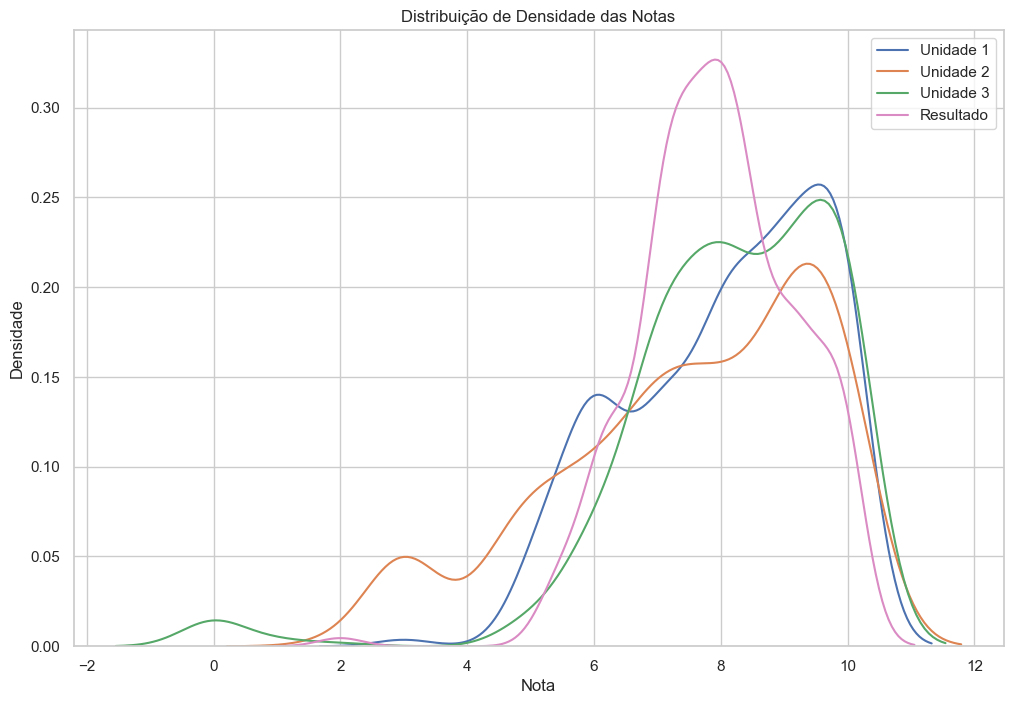

In [14]:
plt.figure(figsize=(12,8))
for coluna in colunas_numericas:
    sns.kdeplot(df[coluna], label=coluna)

plt.title('Distribuição de Densidade das Notas')
plt.xlabel('Nota')
plt.ylabel('Densidade')
plt.legend()
plt.show()

## Ranking dos alunos com maiores médias

In [15]:
ranking = df[['AlunoID', 'Disciplina', 'Media_Aluno']].sort_values(by='Media_Aluno', ascending=False)
ranking.head(10)

,AlunoID,Disciplina,Media_Aluno
830,31,TRABALHO DE CONCLUSÃO DE CURSO II - TCC II,10.0
862,31,BANCO DE DADOS,10.0
1294,40,TRABALHO DE CONCLUSÃO DE CURSO I - TCC I,10.0
892,32,TRABALHO DE CONCLUSÃO DE CURSO I - TCC I,10.0
1281,40,TRABALHO DE CONCLUSÃO DE CURSO II - TCC II,10.0
1243,39,TRABALHO DE CONCLUSÃO DE CURSO I - TCC I,10.0
1231,39,TRABALHO DE CONCLUSÃO DE CURSO II - TCC II,10.0
879,32,TRABALHO DE CONCLUSÃO DE CURSO II - TCC II,10.0
934,33,TRABLO DE CONCLUSÃO DE CURSO II - TCC II,10.0
943,33,TRABALHO DE CONCLUSÃO DE CURSO I - TCC I,10.0


## Análise de Assimetria (Skewness) e Curtose (Kurtosis)

In [16]:
for coluna in colunas_numericas:
    assimetria = skew(df[coluna].dropna())
    curtose = kurtosis(df[coluna].dropna())
    print(f'{coluna}: Assimetria = {assimetria:.2f}, Curtose = {curtose:.2f}')

Unidade 1: Assimetria = -0.51, Curtose = -0.69
Unidade 2: Assimetria = -0.68, Curtose = -0.44
Unidade 3: Assimetria = -2.03, Curtose = 6.75
Unidade 4: Assimetria = nan, Curtose = nan
Unidade 5: Assimetria = nan, Curtose = nan
Prova Final: Assimetria = nan, Curtose = nan
Resultado: Assimetria = -0.44, Curtose = 1.19


C:\Users\cclmp\AppData\Local\Temp\ipykernel_388\1649534045.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  assimetria = skew(df[coluna].dropna())
C:\Users\cclmp\AppData\Local\Temp\ipykernel_388\1649534045.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  curtose = kurtosis(df[coluna].dropna())


# Análise 1: ANOVA + Boxplot por Disciplina

C:\Users\cclmp\AppData\Local\Temp\ipykernel_12348\1576075390.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


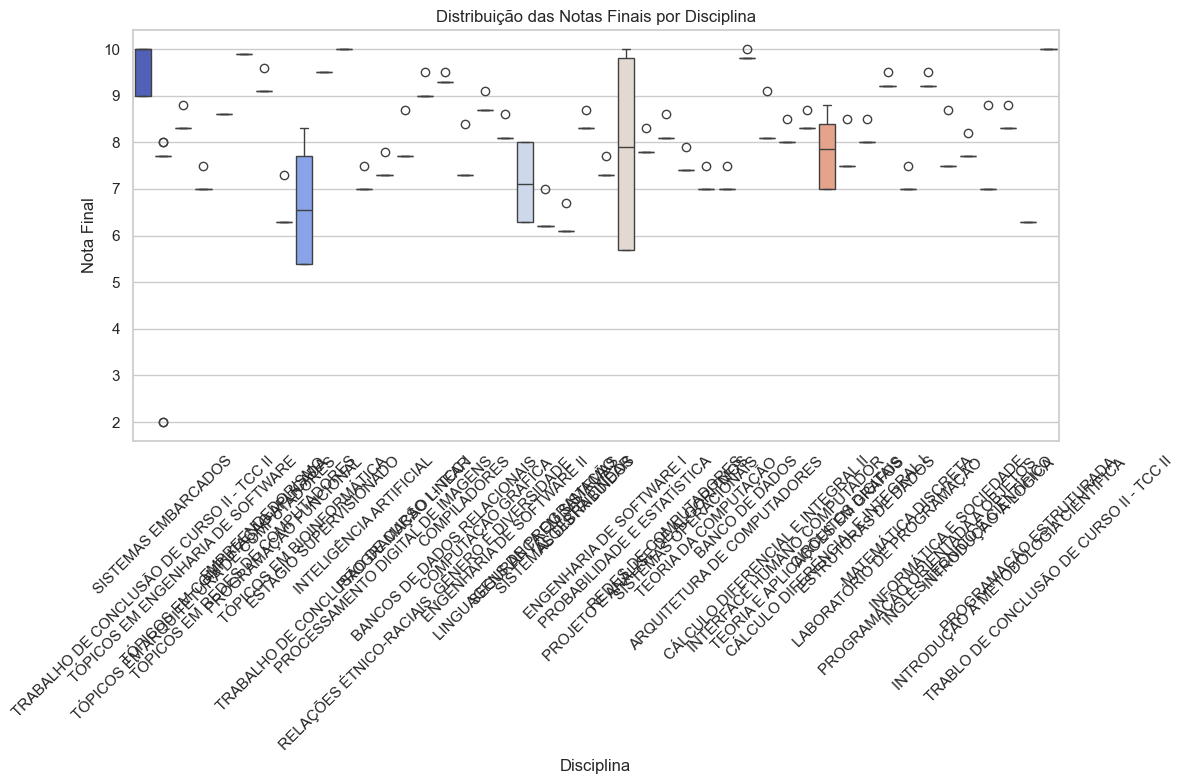

In [18]:
# Verificar existência da coluna
if 'Nota_Final_Calculada' not in df.columns:
    df['Nota_Final_Calculada'] = df['Resultado']  # ou sua regra

# Filtrar dados válidos
df_box = df.dropna(subset=['Nota_Final_Calculada', 'Disciplina'])

plt.figure(figsize=(12,8))
sns.boxplot(
    x='Disciplina', 
    y='Nota_Final_Calculada', 
    data=df_box, 
    palette='coolwarm'
)
plt.title('Distribuição das Notas Finais por Disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Nota Final')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Análise 2: Correlação Média das Unidades vs Prova Final (Gráfico)

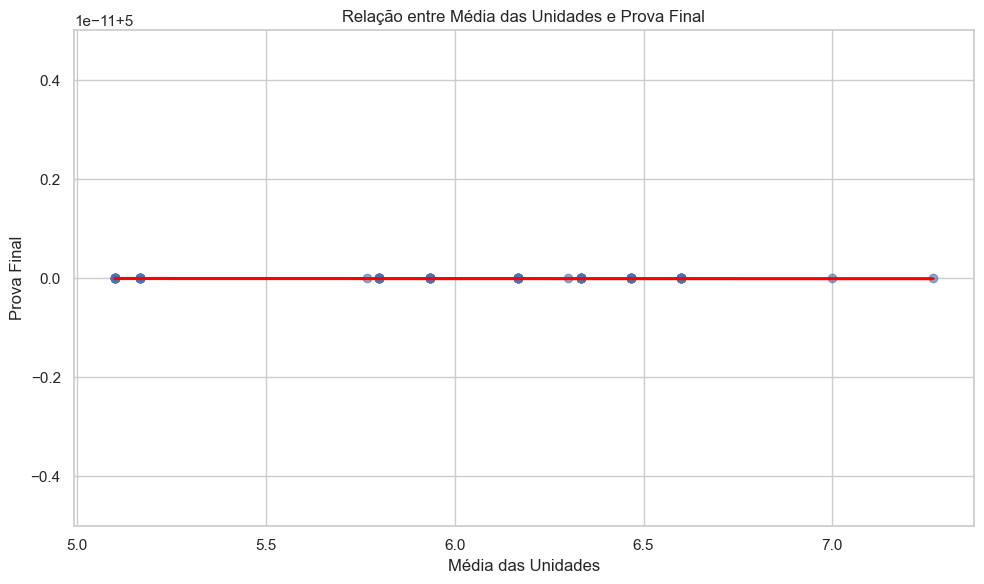

In [19]:
# Garantir as colunas
if 'Media_Unidades' not in df.columns:
    df['Media_Unidades'] = df[['Unidade 1','Unidade 2','Unidade 3','Unidade 4','Unidade 5']].mean(axis=1)

# Filtrar dados válidos
df_corr = df.dropna(subset=['Media_Unidades', 'Prova Final'])

plt.figure(figsize=(10,6))
sns.regplot(
    x='Media_Unidades', 
    y='Prova Final', 
    data=df_corr, 
    scatter_kws={'alpha':0.6}, 
    line_kws={'color':'red'}
)
plt.title('Relação entre Média das Unidades e Prova Final')
plt.xlabel('Média das Unidades')
plt.ylabel('Prova Final')
plt.tight_layout()
plt.show()


# Análise 3 - Boxplot Faltas vs Situação

C:\Users\cclmp\AppData\Local\Temp\ipykernel_12348\1044183167.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


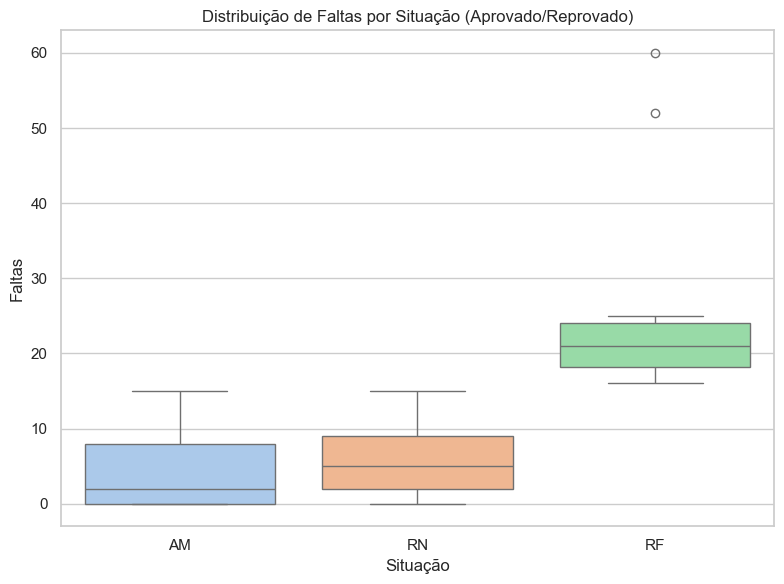

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(
    x='Situação', 
    y='Faltas', 
    data=df.dropna(subset=['Faltas']), 
    palette='pastel'
)
plt.title('Distribuição de Faltas por Situação (Aprovado/Reprovado)')
plt.xlabel('Situação')
plt.ylabel('Faltas')
plt.tight_layout()
plt.show()


# Análise 4 - Faltas vs Nota Final

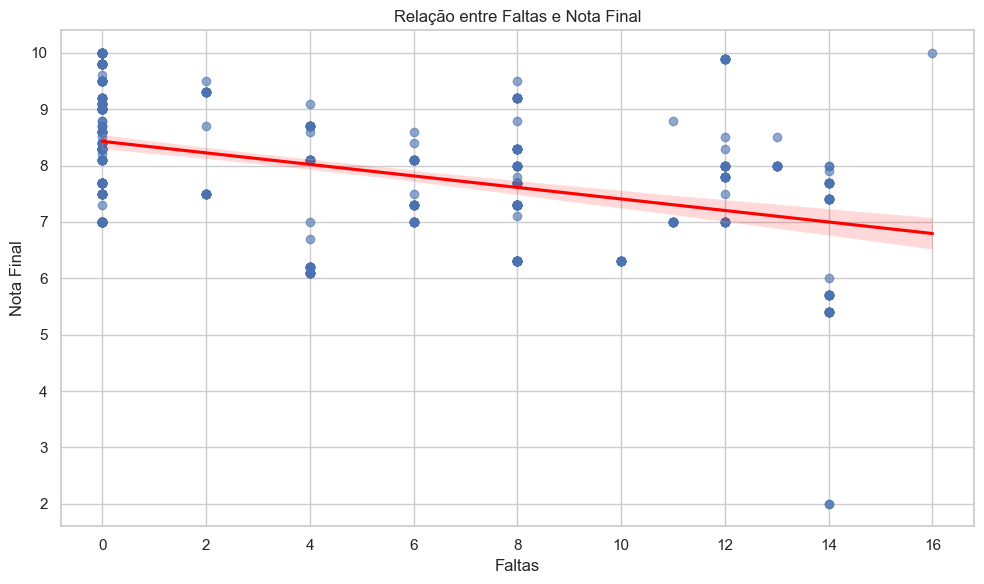

In [20]:
# Garantir que a coluna Nota_Final_Calculada existe
if 'Nota_Final_Calculada' not in df.columns:
    df['Nota_Final_Calculada'] = df['Resultado']  # ou aplique sua regra personalizada

# Garantir que as colunas são numéricas
df['Faltas'] = pd.to_numeric(df['Faltas'], errors='coerce')
df['Nota_Final_Calculada'] = pd.to_numeric(df['Nota_Final_Calculada'], errors='coerce')

# Filtrar dados válidos
df_corr_faltas = df.dropna(subset=['Faltas', 'Nota_Final_Calculada'])

if not df_corr_faltas.empty:
    plt.figure(figsize=(10,6))
    sns.regplot(
        x='Faltas', 
        y='Nota_Final_Calculada', 
        data=df_corr_faltas, 
        scatter_kws={'alpha':0.6}, 
        line_kws={'color':'red'}
    )
    plt.title('Relação entre Faltas e Nota Final')
    plt.xlabel('Faltas')
    plt.ylabel('Nota Final')
    plt.tight_layout()
    plt.show()
else:
    print("❌ Dados insuficientes para gerar o gráfico Faltas vs Nota Final.")


# Análise 5 - Aprovação e Reprovação por Disciplina

) missing from font(s) Arial.Temp\ipykernel_12348\1508403441.py:19: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) Arial.Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


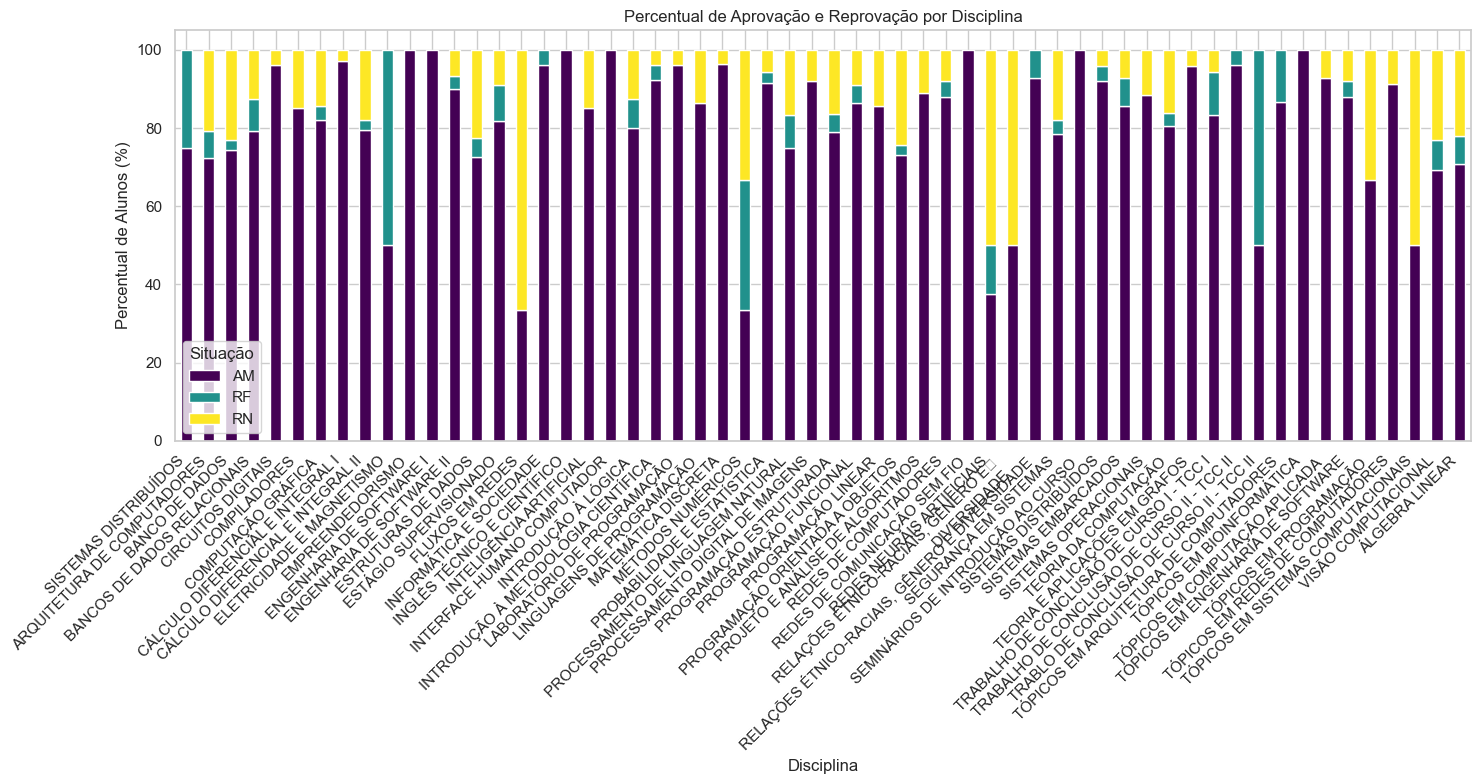

In [21]:
# Garante que as colunas existem
if 'Situação' not in df.columns or 'Disciplina' not in df.columns:
    print("❌ Colunas necessárias (Situação ou Disciplina) não existem no dataframe.")
else:
    crosstab_situacao = pd.crosstab(df['Disciplina'], df['Situação'], normalize='index') * 100

    if not crosstab_situacao.empty:
        crosstab_situacao.plot(
            kind='bar', 
            stacked=True, 
            figsize=(15, 8), 
            colormap='viridis'
        )
        plt.title('Percentual de Aprovação e Reprovação por Disciplina')
        plt.ylabel('Percentual de Alunos (%)')
        plt.xlabel('Disciplina')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Situação')
        plt.tight_layout()
        plt.show()
    else:
        print("❌ Dados insuficientes para gerar o gráfico de Aprovação e Reprovação por Disciplina.")


# Análise 6 - Ranking de Disciplinas com Mais Reprovação

C:\Users\cclmp\AppData\Local\Temp\ipykernel_12348\1769121588.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
) missing from font(s) Arial.Temp\ipykernel_12348\1769121588.py:34: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) Arial.Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


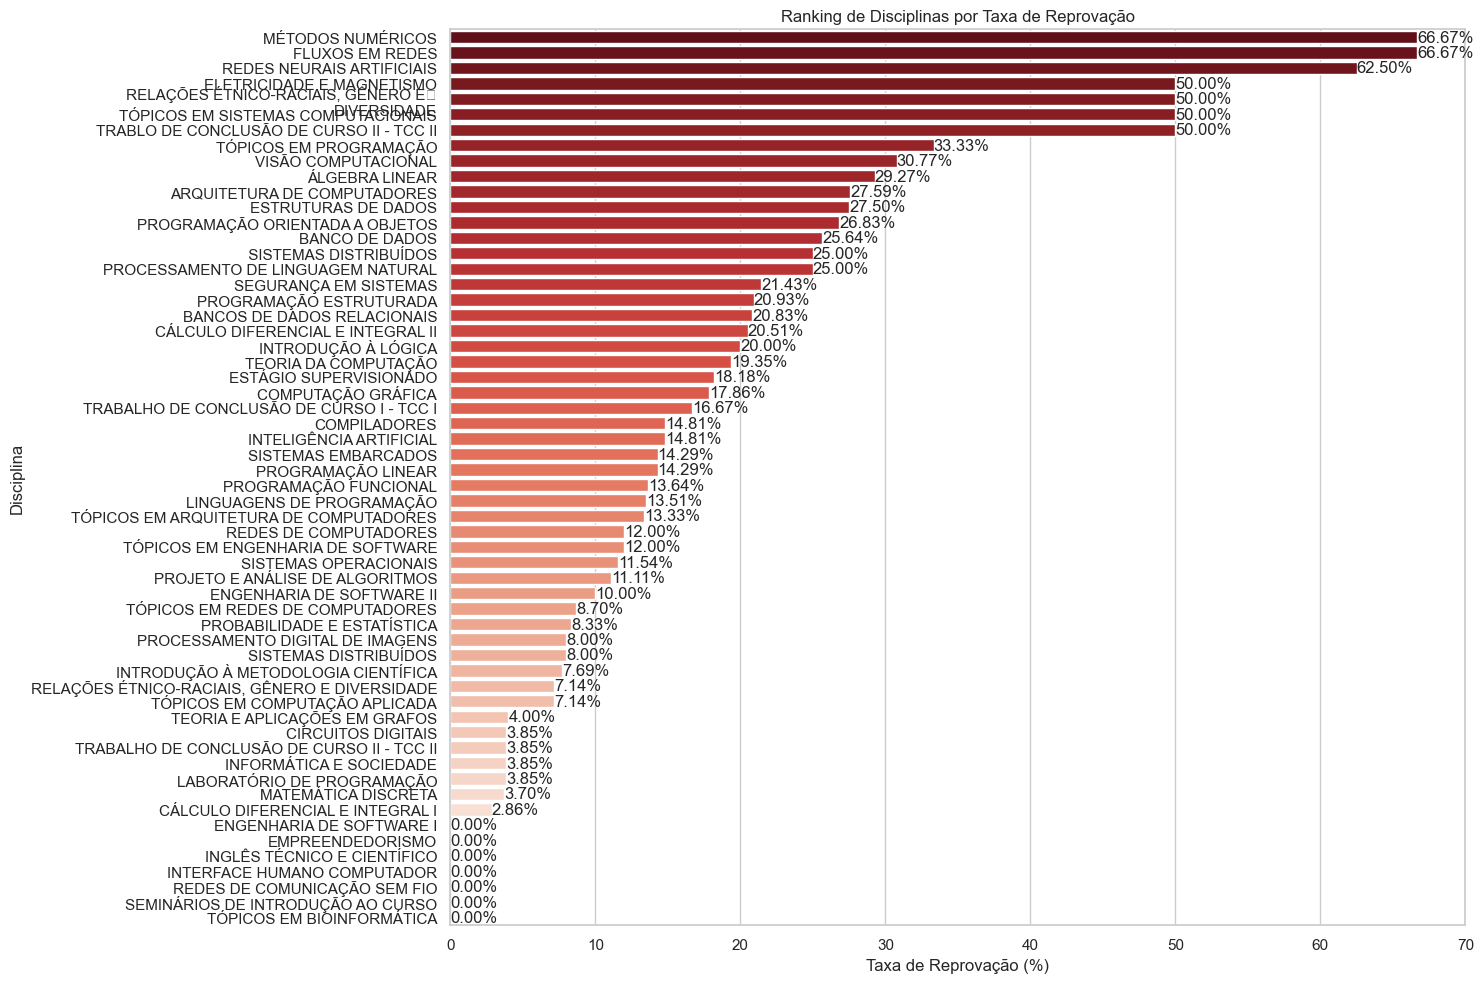

In [25]:
# Checagem das colunas necessárias
if 'Situação' not in df.columns or 'Disciplina' not in df.columns:
    print("❌ Colunas necessárias (Situação ou Disciplina) não existem no dataframe.")
else:
    resumo_disciplinas = df.groupby('Disciplina').agg(
        Media_Geral_Turma=('Nota_Final_Calculada', 'mean'),
        Total_Alunos=('AlunoID', 'count')
    )

    # Correção com o operador |
    reprovados = df[(df['Situação'] == 'RN') | (df['Situação'] == 'RF')].groupby('Disciplina').agg(
        Total_Reprovados=('AlunoID', 'count')
)

    resumo_disciplinas = resumo_disciplinas.join(reprovados).fillna(0)
    resumo_disciplinas['Taxa_Reprovacao_Perc'] = (resumo_disciplinas['Total_Reprovados'] / resumo_disciplinas['Total_Alunos']) * 100

    ranking_reprovacao = resumo_disciplinas.sort_values(by='Taxa_Reprovacao_Perc', ascending=False)

    if not ranking_reprovacao.empty:
        plt.figure(figsize=(15, 10))
        sns.barplot(
            x=ranking_reprovacao['Taxa_Reprovacao_Perc'],
            y=ranking_reprovacao.index,
            palette='Reds_r'
        )
        plt.title('Ranking de Disciplinas por Taxa de Reprovação')
        plt.xlabel('Taxa de Reprovação (%)')
        plt.ylabel('Disciplina')

        for index, value in enumerate(ranking_reprovacao['Taxa_Reprovacao_Perc']):
            plt.text(value, index, f'{value:.2f}%', va='center')

        plt.tight_layout()
        plt.show()
    else:
        print("❌ Dados insuficientes para gerar o ranking de reprovação.")
